In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

feature = pd.read_csv('Feature_Dataset.csv')
shuffled = sklearn.utils.shuffle(feature)

In [30]:
from sklearn.model_selection import train_test_split

# train : test = 0.8 : 0.2
train, test = train_test_split(shuffled, test_size=0.2)

In [31]:
y_train = train.iloc[:,:7]
x_train = train.iloc[:,7:]

y_test = test.iloc[:,:7]
x_test = test.iloc[:,7:]

In [32]:
# min-MAX norm.

x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [33]:
yy_train = np.argmax(y_train.to_numpy(), axis=1)
yy_test = np.argmax(y_test.to_numpy(), axis=1)


---

In [14]:
#RandomForest test

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5)
rf.fit(x_train,yy_train)


RandomForestClassifier(max_depth=5)

In [15]:
from sklearn.metrics import accuracy_score

prd = rf.predict(x_test)

accuracy = accuracy_score(yy_test, prd)

print('Acc: ', accuracy)

Acc:  0.7279411764705882


<AxesSubplot:>

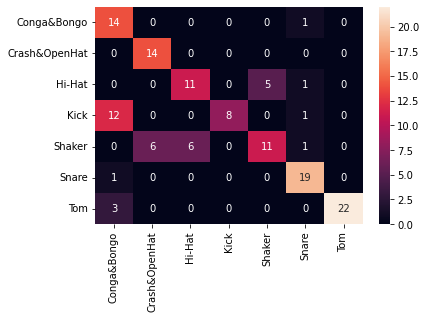

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['Conga&Bongo', 'Crash&OpenHat', 'Hi-Hat', 'Kick', 'Shaker', 'Snare', 'Tom']

cm = pd.DataFrame(confusion_matrix(yy_test, prd), columns=classes, index=classes)
sns.heatmap(cm, annot=True)

In [22]:
# define feature names (from 9th cell of extract.ipynb)
feature_name = []
feature_name.append('duration')
for ch in ['ZCR', 'Flt', 'Bdw', 'Roll']:
    for i in range(14):
        name = str(ch) + '[' + str(i) + ']'
        feature_name.append(name)

In [25]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_name,
                class_names = classes,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

---

+ Classifier Comparison

In [10]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000)
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, yy_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(yy_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(yy_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 73.5294%
Log Loss: 4.3233310048492894
SVC
****Results****
Accuracy: 34.5588%
Log Loss: 0.8225781548475553
NuSVC
****Results****
Accuracy: 78.6765%
Log Loss: 0.581084224037452
DecisionTreeClassifier
****Results****
Accuracy: 68.3824%
Log Loss: 10.920348418979117
RandomForestClassifier
****Results****
Accuracy: 75.0000%
Log Loss: 0.7928910503815544
AdaBoostClassifier
****Results****
Accuracy: 60.2941%
Log Loss: 3.0482170676614917
GradientBoostingClassifier
****Results****
Accuracy: 72.0588%
Log Loss: 1.355629330921335
GaussianNB
****Results****
Accuracy: 69.8529%
Log Loss: 4.855029808159192
LinearDiscriminantAnalysis
****Results****
Accuracy: 75.7353%
Log Loss: 1.1827593185862726
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 40.4412%
Log Loss: 20.187862464289545


c:\Users\cid2r\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


MLPClassifier
****Results****
Accuracy: 81.6176%
Log Loss: 0.5051792200337046


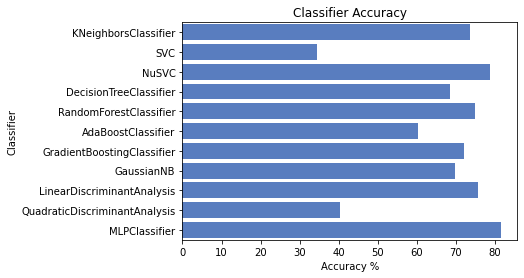

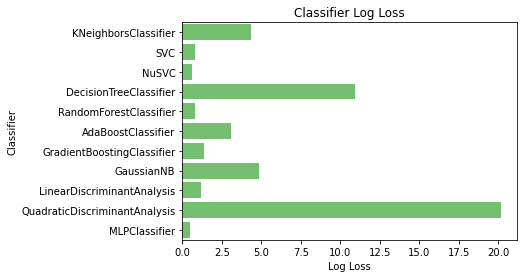

In [11]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()